## SHOPEE REVIEW SENTIMENT ANALYSIS USING NLP and K-NN Algorithm 
BY YUNITA RATNA SARI

In [3]:
import string
import pandas as pd
import numpy as np


### IMPORTING DATASET
Dataset didapatkan menggunakan teknik web scraping dari website google playstore dengan software webharvy.
Di sini saya menggunakan library pandas untuk menampilkan dan membaca dataset.

In [4]:
data = pd.read_csv("C:/Users/LENOVO/Documents/dataset_shopee2.csv", sep=',', encoding='latin1')
data.head(10)

,Review,SENTIMEN
0,puas belanja di shopee banyak diskon dan grati...,POSITIF
1,Aplikasi yang bagus dan sangat membantu,POSITIF
2,saya kecewa kenapa sekarang Shopee sangat eror...,NEGATIF
3,Shope sangat bagus bagi saya saya suka banget ...,POSITIF
4,Kecewa Katanya gratis ongkir . Ternyata mahaln...,NEGATIF
5,KECEWA DENGAN PERUBAHAN EKSPEDISI PENGIRIMANNY...,NEGATIF
6,Bagus banget.. Aku puas.. Pengemasan rapi bang...,POSITIF
7,Aplikasi sangat bagus dan banyak bonus??,POSITIF
8,Aplikasinya sering eror bikin pusing susah bay...,NEGATIF
9,Saya udh kecewa banget... Uang saya belum kemb...,NEGATIF


### Proses Celaning Data

In [5]:
# proses case folding 
def casefolding(Review):
    Review = Review.lower()
    return Review
data['Review'] = data['Review'].apply(casefolding)
data.head(10)

,Review,SENTIMEN
0,puas belanja di shopee banyak diskon dan grati...,POSITIF
1,aplikasi yang bagus dan sangat membantu,POSITIF
2,saya kecewa kenapa sekarang shopee sangat eror...,NEGATIF
3,shope sangat bagus bagi saya saya suka banget ...,POSITIF
4,kecewa katanya gratis ongkir . ternyata mahaln...,NEGATIF
5,kecewa dengan perubahan ekspedisi pengirimanny...,NEGATIF
6,bagus banget.. aku puas.. pengemasan rapi bang...,POSITIF
7,aplikasi sangat bagus dan banyak bonus??,POSITIF
8,aplikasinya sering eror bikin pusing susah bay...,NEGATIF
9,saya udh kecewa banget... uang saya belum kemb...,NEGATIF


In [6]:
# proses cleansing remove regex (cleansing) seperti tanda baca dan angka angka
import re
import string
def cleansing(Review):
    Review = Review.strip(" ")
    Review = re.sub(r'[?|$|.|!_:")(-+,]', '', Review)
    Review = re.sub(r'\d+', '', Review)
    Review = re.sub(r"\b[a-zA-Z]\b", "", Review)
    Review = re.sub('\s+',' ', Review)
    return Review
data['Review'] = data['Review'].apply(cleansing)
data.head(10)


,Review,SENTIMEN
0,puas belanja di shopee banyak diskon dan grati...,POSITIF
1,aplikasi yang bagus dan sangat membantu,POSITIF
2,saya kecewa kenapa sekarang shopee sangat eror...,NEGATIF
3,shope sangat bagus bagi saya saya suka banget ...,POSITIF
4,kecewa katanya gratis ongkir ternyata mahalnya...,NEGATIF
5,kecewa dengan perubahan ekspedisi pengirimanny...,NEGATIF
6,bagus banget aku puas pengemasan rapi banget m...,POSITIF
7,aplikasi sangat bagus dan banyak bonus,POSITIF
8,aplikasinya sering eror bikin pusing susah bay...,NEGATIF
9,saya udh kecewa banget uang saya belum kembali...,NEGATIF


In [7]:
from nltk.tokenize import word_tokenize
#NLTK word tokenize
def word_tokenize_wrapper(text):
 return word_tokenize(text)
data['Review'] = data['Review'].apply(word_tokenize_wrapper)
data.head()

,Review,SENTIMEN
0,"[puas, belanja, di, shopee, banyak, diskon, da...",POSITIF
1,"[aplikasi, yang, bagus, dan, sangat, membantu]",POSITIF
2,"[saya, kecewa, kenapa, sekarang, shopee, sanga...",NEGATIF
3,"[shope, sangat, bagus, bagi, saya, saya, suka,...",POSITIF
4,"[kecewa, katanya, gratis, ongkir, ternyata, ma...",NEGATIF


In [8]:
normalizad_word = pd.read_csv("C:/Users/LENOVO/Documents/normalisasi.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

data['Review'] = data['Review'].apply(normalized_term)

data['Review'].head(20)

0     [puas, belanja, di, shopee, banyak, diskon, da...
1        [aplikasi, yang, bagus, dan, sangat, membantu]
2     [saya, kecewa, kenapa, sekarang, shopee, sanga...
3     [shope, sangat, bagus, bagi, saya, saya, suka,...
4     [kecewa, katanya, gratis, ongkir, ternyata, ma...
5     [kecewa, dengan, perubahan, ekspedisi, pengiri...
6     [bagus, banget, aku, puas, pengemasan, rapi, b...
7         [aplikasi, sangat, bagus, dan, banyak, bonus]
8     [aplikasinya, sering, eror, bikin, pusing, sus...
9     [saya, sudah, kecewa, banget, uang, saya, belu...
10    [shopee, emang, keren, bangetlah, tapi, sayang...
11    [untuk, sampai, saat, ini, masih, bagus, perta...
12               [bagus, tingkatkan, terus, ya, shopee]
13    [shopee, keren, cuman, ada, yang, jual, terlal...
14                         [bagus, banget, aplikasinya]
15    [kelebihan, barang, yang, dijual, lengkap, dar...
16    [makasih, shopee, mantap, kali, lain, mau, pes...
17    [suka, barang, nya, cuma, pengiriman, nya,

In [ ]:

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = pd.read_csv("C:/Users/LENOVO/Documents/stopwords.csv")
def stopword_removal(Review):
    filtering = stopwords.words('indonesian','english')
    filtering.extend(sw)
    x = []
    data = []
    def myFunc(x):
        if x in filtering:
            return False
        else:
            return True
    fit = filter(myFunc, Review)
    for x in fit:
        data.append(x)
    return data
data['Review'] = data['Review'].apply(stopword_removal)
data.head(10)

### Proses Stemming dan Membuat file data baru (dataset yang sudah dibersihkan melalui proses NLTK)

In [10]:
# proses stemming
! pip install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(Review):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in Review:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean=[]
    d_clean=" ".join(do)
    print(d_clean)
    return d_clean
data['Review'] = data['Review'].apply(stemming)

data.to_csv('shopeebersih.csv', index=False)
data_clean = pd.read_csv('shopeebersih.csv', encoding='latin1')
data_clean.head()

You should consider upgrading via the 'c:\users\lenovo\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


puas belanja shopee diskon gratis ongkir jual kurir sopan
aplikasi bagus bantu
kecewa shopee eror checkout aja susah
shope bagus suka banget shopee
kecewa gratis ongkir mahal bayar
kecewa ubah ekspedisi kirim cepat ongkirnya murah mahal
bagus banget puas emas rapi banget makasih ya seller
aplikasi bagus bonus
aplikasi eror bikin pusing susah bayar susah cari
kecewa banget uang pesan
shopee emang keren banget sayang shopee later pakai
bagus tahan ya
bagus tingkat ya shopee
shopee keren cuman jual mahal barang mesti ken
bagus banget aplikasi
lebih barang jual lengkap luat negeri proses bayar mudah aman kurang loading banget cuman masukin barang keranjang sih chace nya tambah versi baru plus clear chace admin aja loulasan lengkap
makasih shopee mantap kali pesan bravo shopee masker untuh halang virus korona dunia wabil khusus indonesia raya cinta hehe
suka barang nya kirim nya kadang
barang cari
terimakasih shopee
barang sesuai gambar
suka moga aman amanah ya terimakasih shopee
mesan prog

mudah cepat layan terimakasih shopee
tingkat aplikasi bagus
mantap shopee baik
lumayan cari pengahasilan sinitapi malas ny diperbaruin
bantu
bagus layan muas
shopee keren bantu beli butuh cepat
suka belanja dishopee percaya baik deh pokok
hai shopee suka banget kamutapi jasa kirim otomatis beli nggak bikin pesan nggak check out dehgimana coba
sekian belanja shopee kecewa
shopee mantap tahan
bagus terimakasih shopee
belanja shoppe alhamdulillah barang sesuai tahan tingkat layan moga nyecewain
bantu semogaa shopee ny teliti produk jual biar palsu gitu ngerugiin nama shope hhe
kualitas produk pngiriman barang aja ongkir mahal
pakai shoppe emang mantep pas fitur paylater kagak ya tolong shoppe adain fitur paylater ngebantu usaha moga depan
bagus banget aplikasi bantu jual ngerti daftar rekening masuk nya sms pemberitahuan kode nya tolong bantu nya
walaus bagus jual curang bintang aja
bravo shopeeharus profesional pilih prodaks murtagus murah bagus
moga amanah
puas belanja shopee
produk kom

mantap ni grastis ongkir muluk sesal deh beli beli
alam mesan kali kesan coba produk rp nya beneran loh kirim kemas produk rp nya makasih shopee lirik deh
shopee cakep
suka shopee
bagus
pandemi belanja online solusi suka shopee
bagus
cari aja shopee mudah belanja perlu rumah perlu babanyaku perlu belanja moga depan gratis ongkir harga murah ya hehehe sukses shopee
layan ramah lumayan cepat
alus pis topplah
barang sesuai pesan sesuai foto kasih gratis ongkir suuiiippp
aman belanja shopee barang pesan shopee bantuin
shopee the baik
manfaat
bantu berbelanjaa terima kasih
dah kasi starselama blnj shopee blm prnh bermasalahshopee shopee shopeesop sapi
please shope bikin game hasil koin note shope tanam pas goyang dapat plis bikin game kaya subway surt gimana hasil koin hehe saran moga baca realisasi
bagus banget shopee zaman suka aplikasi mohon tingkat mimin aplikasi shopee kembang
belanja shopee aman jual amanah so never doubt
barang bagus kirim cepat
shopee mntaapp
mantap mudah pakai
alha

dear shopee beli nyaman sistem pilih ekspedisi sblmnya pilih nominal ongkirnya ekspedisi shopee banyak extraongkir sdengankn toko langgan pakai tolong tiru lapak belah ntah masuk guna nggak sbg langgan keluh shopee pilih  
tingkat awas jual lapak tindak jual produk layak non sni voucher cashback pakai shopeepay
terimakasih kk kirim cepat baju bagus baju lampu led mati bagus next order
enak belanja pakai shopee
aplikasi racun pas tanggal muda but love shopeeselalu mudah belanja
suka banget shope bayar pakai shopee pay enak banget gratis ongkir pokok love shopee orang enak enak banget loh belanja shopee baik logout
suka belanja dsni lot banget belanja merchant shopee mart mall batal dg alas
sungguh sayang aplikasi wilayah jasa kurir grab gosend cek wilayah jadetabek wilayah adil bangetu maaf hny masuk moga kurir rata wilayah
suka aplikasi ya verifikasi no telpku gak sms sophee sebbel deh
suka bngt belanja disinitapi turun rewardnya belanja plus koin ckup bayar shopeepay dlu enggakintinya

shoper penipuanhati kami sulit ambil kembali danaaplikasi shopee tipu
gtwshoppe maksa gw kasi nilaiya gw kasi
tipu kedok kode verifikasi tolong tindak lanjut aman shopee
kluar akun sandi bner ttep salah trlanjur beli barang gimana sih
update fitur fontnya tetep ubah
woy shopee gua kirim alamat tulis salah
susah tentu alamat
pilihanbarang muncul dilayarmohon bantuanyaterimakasih
shopeepaylatter muncul
order barangmau cancel salah pilih batal tolak barang kirim kecewa kecewa aplikasi
gak daper voucher cok
ngorder barang
akun google gw hilang gara gara daftar shopee
puas akun batas aju banding tolak kecewa customer percaya kpd shopee jadi kecewa
shoping kadang gk bener sen gak anter
knapa ya shopee tdak instal
pilih jasa kirim sedih bikin ilfeel tingkat turun standar tinggal ya
kecewa shopee opsi kirim kaya ongkir mkain mahal cari laen aja ongkir masuk akal
bagus jelek aplikasi
maaf bintang bintang tolong kembali pilih pilih jasa kirim
pilih jasa kirim jnt sicepat dkk impactnya kirim
kema

ya shopee susah buka
mulumau live aja ganggu
shoppepay later kunci update info gak telat bayar ub cs ya tentu sesuai ngk buka donk blokir shoppelater
parah bnget buka fto dagang nya lot baik aplikasi nya kaya gin
cod barang antar kurir jnt shopee sanggup kurir jnt antar pakait cod cod kerjasama kurir kecewa langgan
mahal barang
gratis ongkir huh nggak
lunas saldo spaylater dikembaliin parah si emang
voucher gratis ongkir cashback gratis ongkir cashback pilih salah tau doang klik sama
ka nge instal kenapaa aplikasi nya muncul hp sayah sayah brulang kali nge instal aplikasi
potong rb belanja rb potongn cuman rb
vouchernya pakai iklanya menganggu
dah malas
kirim mahal kayak vouchernya bantu
maaf gin ongkir pilih ubah ongkir cek out bayar tau rubah ongkir mana milih ongkir laahh anehh tau exp cepatt langgan biar pilih exp
aplikasi gede shopee problem masukin akun gimana belanja iklan mana problem mending kurang budget iklan baik aplikasi nyaa
ribet ganti nomer aja ribetapa sekolah hacker b

barang diterimatapi aplikasi tunjuk barang dikirimgimna coba bikin pusing ajaribet banget nya tolong baik lagi depa
kode kirim ngebug
voucher gratis ongkirnya pakai
kenapaaa jasa kirim gaada jnt dkk woiii sedih gabisa atur sendiripliss shopee balikin kayak ya
kenapasiii jasa kirim pilih sendiriiii maaf ya kasih bintang tolong ubah
shopee express standard kirim nggak update
update gak jasa kirim tolong perhati beli cari baik jasa kirim  shopecare tlong menu kirim ubah pilih ekspedisi ekspedisi daerh plus minus klau rondom gak tau ekspedisi nya pakai klau pas cocok daerah yaa bagus klau
buruk diupdate login jasa kirim otomatis pilih shopee fair gilir beli ubah opsi jasa kirim eh keduluan seller acc jasa kirim ongkir id express cuman semenjak bijak shopee korupsi
diapdute ko lihat etalase toko nya yamalah informasi ganggu suruh muat ulang aja liat barang nya
akun beku langgar aja telpon atas nama shoppe hadiah tau nama alamat lengkap nomor percaya akun beku akun nge hack
tolong mengunduhn

kesini shopee pelit gratis ongkir gitu sekali gratis ongkir shopee pay shopee pay paylater transfer nihil mending alih aplikasi
pakai voucher gratis ongkir main shopee tanam biar gratis ongkir eh pas panen voucher nya pakai voucher gratis ongkir pas check out voucher nya --
shopee pelit aja nih gratis ongkirnya skarenag shopee minimal belanja rb rb gin malas
login chat sm shoppie suruh logout dlu login niy log out log onsebel jaring waepdhal hapus download aplikasi nya tolong solusi
bagus banget aplikasi shopee bikin kepala pusing terima kasih ya
suka aplikasi shopee shopee tanam kilat menit menit menit logout keburu bin ah
kirim mahal
dukung wilayah indonesia kecewa
kecewaaaaasudah jam status ubah kemaspadahal info jual barang kirim
narik dana jual tanggal -- -- masuk rekening bank komplain email tanggap dasar aplikasi buruk
kesini buruk aplikasi shopeebaru isi saldo shopeepay langsung aplikasi nya dinonaktifkanjangan download nyesel
kenapaa sope pay laternya yaaa punyak padahl da pak

,Review,SENTIMEN
0,puas belanja shopee diskon gratis ongkir jual ...,POSITIF
1,aplikasi bagus bantu,POSITIF
2,kecewa shopee eror checkout aja susah,NEGATIF
3,shope bagus suka banget shopee,POSITIF
4,kecewa gratis ongkir mahal bayar,NEGATIF


In [1]:
import string
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import re

In [2]:
data_clean = pd.read_csv('shopeebersih.csv', encoding='latin1')
data_clean.head()

,Review,SENTIMEN
0,puas belanja shopee diskon gratis ongkir jual ...,POSITIF
1,aplikasi bagus bantu,POSITIF
2,kecewa shopee eror checkout aja susah,NEGATIF
3,shope bagus suka banget shopee,POSITIF
4,kecewa gratis ongkir mahal bayar,NEGATIF


In [3]:
data_clean = data_clean.astype({'SENTIMEN' : 'category'})
data_clean = data_clean.astype({'Review' : 'string'})
data_clean.dtypes

Review        string
SENTIMEN    category
dtype: object

## Proses TF-IDF

In [4]:
# PROSES TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_clean['Review'].astype('U'))

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean['Review'].astype('U'))
print(text_tf)

  (0, 1894)	0.4973849359042747
  (0, 973)	0.3859651001863744
  (0, 803)	0.3322900358805096
  (0, 1409)	0.265078756595941
  (0, 639)	0.27354683644607103
  (0, 464)	0.40389968790903774
  (0, 1794)	0.16114082366566082
  (0, 203)	0.21396279890775727
  (0, 1603)	0.3365211402556181
  (1, 169)	0.7256888802818434
  (1, 137)	0.5192631753965651
  (1, 97)	0.45137722994448953
  (2, 1944)	0.45096566701598506
  (2, 26)	0.3374346427605498
  (2, 355)	0.5495523423281827
  (2, 542)	0.4662274914342256
  (2, 860)	0.3576913991529508
  (2, 1794)	0.1882786267276488
  (3, 158)	0.4135401826385118
  (3, 1929)	0.44052452483057114
  (3, 1792)	0.632760594827925
  (3, 137)	0.4041120331709157
  (3, 1794)	0.2668897799571671
  (4, 188)	0.4686560136441265
  (4, 1102)	0.5256773570361566
  :	:
  (890, 97)	0.27811609956492306
  (891, 1451)	0.37935888522663136
  (891, 1612)	0.37935888522663136
  (891, 1022)	0.37935888522663136
  (891, 1895)	0.37935888522663136
  (891, 883)	0.3206987216593169
  (891, 2182)	0.342348442682644

## Proses Cosine Similarity 

In [5]:
# Import cosine_similarity metrics
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
# compute similarity using cosine similarity
cos_sim=cosine_similarity(text_tf, text_tf)

print(cos_sim)

[[1.         0.         0.03033937 ... 0.         0.04102974 0.35972654]
 [0.         1.         0.         ... 0.13362254 0.17160085 0.        ]
 [0.03033937 0.         1.         ... 0.         0.         0.05899619]
 ...
 [0.         0.13362254 0.         ... 1.         0.11254336 0.        ]
 [0.04102974 0.17160085 0.         ... 0.11254336 1.         0.07978406]
 [0.35972654 0.         0.05899619 ... 0.         0.07978406 1.        ]]


In [7]:
# splitting data 
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cos_sim, data_clean['SENTIMEN'], test_size=0.2, random_state=33)
print("Jumlah Data Uji:", X_test.shape)
print("Jumlah Data Latih:",X_train.shape)

pos = (y_test == 'POSITIF').sum()
neg = (y_test == 'NEGATIF').sum()
postrain = (y_train == 'POSITIF').sum()
negtrain = (y_train == 'NEGATIF').sum()
total = pos + neg
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen negatif:",neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data latih dengan sentimen negatif:",negtrain)
data_clean['SENTIMEN'].value_counts()

Jumlah Data Uji: (179, 895)
Jumlah Data Latih: (716, 895)
Jumlah data uji dengan sentimen positif: 94
Jumlah data uji dengan sentimen negatif: 85
Jumlah data latih dengan sentimen positif: 375
Jumlah data latih dengan sentimen negatif: 341


POSITIF    469
NEGATIF    426
Name: SENTIMEN, dtype: int64

### Perform algoritma KNN 

In [8]:
# perform algoritma KNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
predicted = clf.predict(X_test)
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
print(classification_report(y_test, predicted, zero_division=0))
print('===============================================\n')
print("Hasil Klasifikasi Sentimen Analisis Shopee:")
print("Accuracy:" , accuracy_score(y_test,predicted))
print("Precision:" , precision_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("Recall:" , recall_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("error_rate:", 1-accuracy_score(y_test,predicted))


confusion matrix:
 [[72 13]
 [19 75]]

TN: 72
FP: 13
FN: 19
TP: 75
              precision    recall  f1-score   support

     NEGATIF       0.79      0.85      0.82        85
     POSITIF       0.85      0.80      0.82        94

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179


Hasil Klasifikasi Sentimen Analisis Shopee:
Accuracy: 0.8212290502793296
Precision: 0.8522727272727273
Recall: 0.7978723404255319
f1_score: 0.8241758241758241
error_rate: 0.17877094972067042


In [148]:
# splitting data 70:30
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cos_sim, data_clean['SENTIMEN'], test_size=0.3, random_state=33)
print("Jumlah Data Uji:", X_test.shape)
print("Jumlah Data Latih:",X_train.shape)

pos = (y_test == 'POSITIF').sum()
neg = (y_test == 'NEGATIF').sum()
postrain = (y_train == 'POSITIF').sum()
negtrain = (y_train == 'NEGATIF').sum()
total = pos + neg
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen negatif:",neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data latih dengan sentimen negatif:",negtrain)
data_clean['SENTIMEN'].value_counts()

Jumlah Data Uji: (269, 895)
Jumlah Data Latih: (626, 895)
Jumlah data uji dengan sentimen positif: 142
Jumlah data uji dengan sentimen negatif: 127
Jumlah data latih dengan sentimen positif: 327
Jumlah data latih dengan sentimen negatif: 299


POSITIF    469
NEGATIF    426
Name: SENTIMEN, dtype: int64

In [147]:
# perform algoritma dengan 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
predicted = clf.predict(X_test)
print("knn Accuracy:" , accuracy_score(y_test,predicted))
print("knn Precision:" , precision_score(y_test,predicted, average="binary", pos_label="NEGATIF"))
print("knn Recall:" , recall_score(y_test,predicted, average="binary", pos_label="NEGATIF"))
print("knn f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="NEGATIF"))

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
print(classification_report(y_test, predicted, zero_division=0))


knn Accuracy: 0.7620817843866171
knn Precision: 0.704225352112676
knn Recall: 0.819672131147541
knn f1_score: 0.7575757575757576
confusion matrix:
 [[100  22]
 [ 42 105]]

              precision    recall  f1-score   support

     NEGATIF       0.70      0.82      0.76       122
     POSITIF       0.83      0.71      0.77       147

    accuracy                           0.76       269
   macro avg       0.77      0.77      0.76       269
weighted avg       0.77      0.76      0.76       269



In [123]:
# splitting data 60:40
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cos_sim, data_clean['SENTIMEN'], test_size=0.4, random_state=33)
print("Jumlah Data Uji:", X_test.shape)
print("Jumlah Data Latih:",X_train.shape)

pos = (y_test == 'POSITIF').sum()
neg = (y_test == 'NEGATIF').sum()
postrain = (y_train == 'POSITIF').sum()
negtrain = (y_train == 'NEGATIF').sum()
total = pos + neg
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen negatif:",neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data latih dengan sentimen negatif:",negtrain)
data_clean['SENTIMEN'].value_counts()

Jumlah Data Uji: (358, 895)
Jumlah Data Latih: (537, 895)
Jumlah data uji dengan sentimen positif: 184
Jumlah data uji dengan sentimen negatif: 174
Jumlah data latih dengan sentimen positif: 285
Jumlah data latih dengan sentimen negatif: 252


POSITIF    469
NEGATIF    426
Name: SENTIMEN, dtype: int64

In [128]:
# perform algoritma 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


clf = KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)
predicted = clf.predict(X_test)
print("knn Accuracy:" , accuracy_score(y_test,predicted))
print("knn Precision:" , precision_score(y_test,predicted, average="binary", pos_label="NEGATIF"))
print("knn Recall:" , recall_score(y_test,predicted, average="binary", pos_label="NEGATIF"))
print("knn f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="NEGATIF"))

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
print(classification_report(y_test, predicted, zero_division=0))


knn Accuracy: 0.7821229050279329
knn Precision: 0.75
knn Recall: 0.8275862068965517
knn f1_score: 0.7868852459016394
confusion matrix:
 [[144  30]
 [ 48 136]]

              precision    recall  f1-score   support

     NEGATIF       0.75      0.83      0.79       174
     POSITIF       0.82      0.74      0.78       184

    accuracy                           0.78       358
   macro avg       0.78      0.78      0.78       358
weighted avg       0.79      0.78      0.78       358



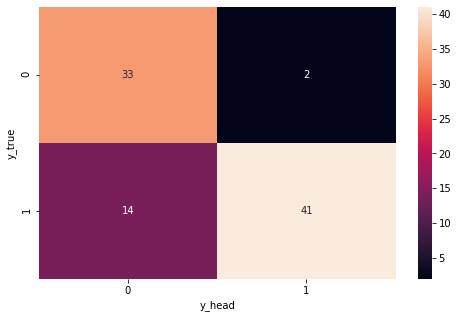

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [2]:
import string
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import re

In [3]:
data_clean = pd.read_csv('shopeebersih.csv', encoding='latin1')
data_clean.head()

,Review,SENTIMEN
0,puas belanja shopee diskon gratis ongkir jual ...,POSITIF
1,aplikasi bagus bantu,POSITIF
2,kecewa shopee eror checkout susah,NEGATIF
3,shope bagus suka banget shopee,POSITIF
4,kecewa gratis ongkir mahal bayar,NEGATIF


In [4]:
data_clean = data_clean.astype({'SENTIMEN' : 'category'})
data_clean = data_clean.astype({'Review' : 'string'})
data_clean.dtypes

Review        string
SENTIMEN    category
dtype: object

In [5]:
# PROSES TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean['Review'].astype('U'))
print(text_tf)

  (0, 1873)	0.4973849359042747
  (0, 961)	0.3859651001863744
  (0, 793)	0.3322900358805096
  (0, 1391)	0.265078756595941
  (0, 631)	0.27354683644607103
  (0, 458)	0.40389968790903774
  (0, 1775)	0.16114082366566082
  (0, 200)	0.21396279890775727
  (0, 1584)	0.3365211402556181
  (1, 166)	0.7256888802818434
  (1, 134)	0.5192631753965651
  (1, 94)	0.45137722994448953
  (2, 1924)	0.4790632239979318
  (2, 350)	0.5837923729613375
  (2, 534)	0.4952759411616832
  (2, 849)	0.37997747369196005
  (2, 1775)	0.20000938547468944
  (3, 155)	0.4135401826385118
  (3, 1909)	0.44052452483057114
  (3, 1773)	0.632760594827925
  (3, 134)	0.4041120331709157
  (3, 1775)	0.2668897799571671
  (4, 185)	0.4686560136441265
  (4, 1088)	0.5256773570361566
  (4, 849)	0.4447436836738466
  :	:
  (890, 1790)	0.24637269160976316
  (890, 94)	0.28145679193552614
  (891, 1433)	0.4037566630040564
  (891, 1593)	0.4037566630040564
  (891, 1010)	0.4037566630040564
  (891, 1874)	0.4037566630040564
  (891, 872)	0.3413238775453428

In [6]:
# Import cosine_similarity metrics
from sklearn.metrics.pairwise import cosine_similarity
# compute similarity using cosine similarity
cos_sim=cosine_similarity(text_tf, text_tf)

print(cos_sim)

[[1.         0.         0.03222968 ... 0.         0.04102974 0.35972654]
 [0.         1.         0.         ... 0.13362254 0.17160085 0.        ]
 [0.03222968 0.         1.         ... 0.         0.         0.06267197]
 ...
 [0.         0.13362254 0.         ... 1.         0.11254336 0.        ]
 [0.04102974 0.17160085 0.         ... 0.11254336 1.         0.07978406]
 [0.35972654 0.         0.06267197 ... 0.         0.07978406 1.        ]]


In [156]:
# splitting data menjadi 30 dan 70
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cos_sim, data_clean['SENTIMEN'], test_size=0.2, random_state=33)
print(X_test)
print(y_test)

[[0.04570051 0.         0.         ... 0.         0.04095843 0.08886657]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.37197362 0.         0.06100475 ... 0.17496544 0.08250035 0.7233184 ]
 ...
 [0.0849554  0.         0.15216301 ... 0.         0.         0.16519936]
 [0.04493151 0.         0.03965521 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
862    NEGATIF
706    NEGATIF
249    POSITIF
690    NEGATIF
259    POSITIF
        ...   
485    NEGATIF
162    POSITIF
571    NEGATIF
635    NEGATIF
27     POSITIF
Name: SENTIMEN, Length: 179, dtype: category
Categories (2, object): ['NEGATIF', 'POSITIF']


In [159]:
# perform algoritma 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("knn Accuracy:" , accuracy_score(y_test,predicted))
print("knn Precision:" , precision_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("knn Recall:" , recall_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("knn f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="POSITIF"))

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
print(classification_report(y_test, predicted, zero_division=0))

knn Accuracy: 0.7039106145251397
knn Precision: 0.7029702970297029
knn Recall: 0.7553191489361702
knn f1_score: 0.7282051282051281
confusion matrix:
 [[55 30]
 [23 71]]

              precision    recall  f1-score   support

     NEGATIF       0.71      0.65      0.67        85
     POSITIF       0.70      0.76      0.73        94

    accuracy                           0.70       179
   macro avg       0.70      0.70      0.70       179
weighted avg       0.70      0.70      0.70       179



In [93]:
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
tn, fp, fn, tp

(33, 2, 15, 40)

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [91]:
knn = KNeighborsClassifier(n_neighbors=3)
cross_val_score(knn, cos_sim, data_clean['SENTIMEN'], cv=10)

array([0.83333333, 0.76666667, 0.78888889, 0.81111111, 0.78888889,
       0.78651685, 0.85393258, 0.83146067, 0.86516854, 0.71910112])

In [92]:
cross_val_score(knn, cos_sim, data_clean['SENTIMEN'], cv=10).mean()

0.8045068664169787